In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import numpy as np
from numpy import array
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")

In [3]:
import yfinance as yf
data = yf.download('^GSPC', start = '2023-01-01', end = '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2023-01-03,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
2023-01-04,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
2023-01-05,3808.100098,3839.739990,3802.419922,3839.739990,3893450000
2023-01-06,3895.080078,3906.189941,3809.560059,3823.370117,3923560000
2023-01-09,3892.090088,3950.570068,3890.419922,3910.820068,4311770000


In [4]:
data.columns = [col[1] if col[0] == '^GSPC' else col[0] for col in data.columns]
data.reset_index(inplace = True)
data.head(3)

,Date,Close,High,Low,Open,Volume
0,2023-01-03,3824.139893,3878.459961,3794.330078,3853.290039,3959140000
1,2023-01-04,3852.969971,3873.159912,3815.770020,3840.360107,4414080000
2,2023-01-05,3808.100098,3839.739990,3802.419922,3839.739990,3893450000


In [5]:
df = data[["Close"]].copy()
df.describe()

,Close
count,502.000000
mean,4858.262171
std,649.881289
min,3808.100098
25%,4295.162598
50%,4760.020020
75%,5435.937500
max,6090.270020


In [6]:
print("ADF (Augumented Dickey fuller) test \n This tests to check if the price series is stationary. \n The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is lessthan the significance level (0.05), then the null hypothesis is rejected. \n Then, we infer that the time series is indeed stationary")

ADF (Augumented Dickey fuller) test 
 This tests to check if the price series is stationary. 
 The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is lessthan the significance level (0.05), then the null hypothesis is rejected. 
 Then, we infer that the time series is indeed stationary


In [7]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df.Close.dropna())
print(f"ADF Statistics {results[0]}")

ADF Statistics -0.6953682953644099


In [8]:
print(f"p-value {results[1]}")

p-value 0.8479456087585396


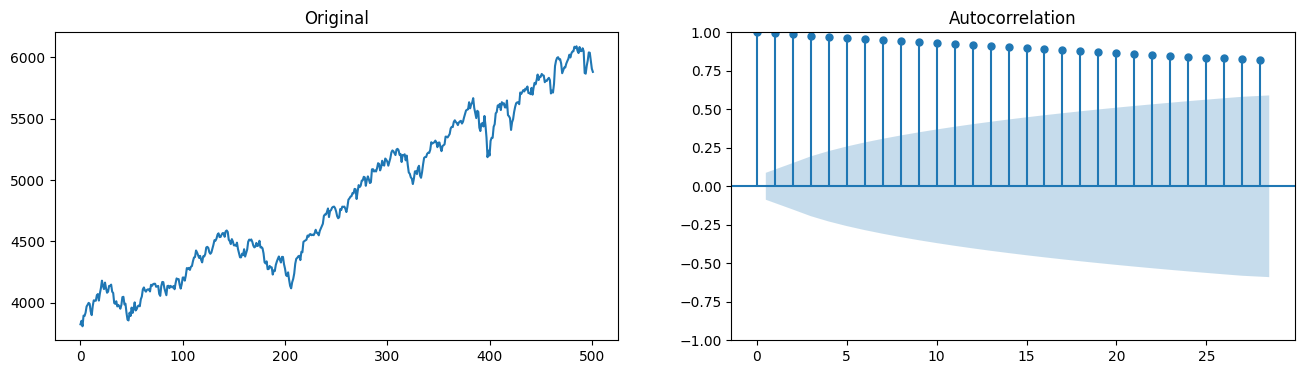

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close, ax=ax2);

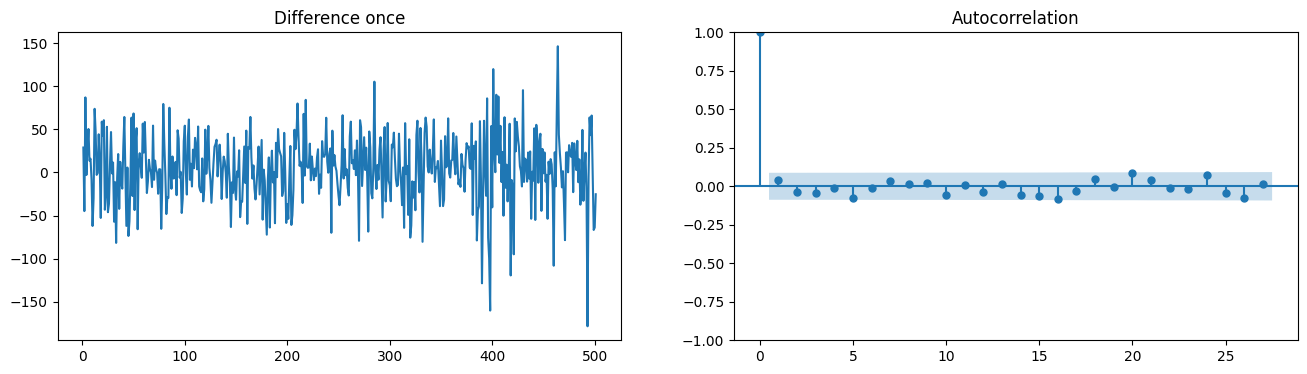

In [10]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [11]:
print("After the first differencing, we can see the returns of the close price and it is randomly distributed around the mean of 0.\n Therefore: d = 1")

After the first differencing, we can see the returns of the close price and it is randomly distributed around the mean of 0.
 Therefore: d = 1


In [13]:
print("Now, if we just difference once, we might not get a stationary series so we might need to do that multiple times.\n And the minimum number of differencing operations needed to make the series stationary will be inputed into our ARIMA code as 'd' ")

Now, if we just difference once, we might not get a stationary series so we might need to do that multiple times.
 And the minimum number of differencing operations needed to make the series stationary will be inputed into our ARIMA code as 'd' 


In [14]:
print("Now, find 'p' the order of the autoregressive (AR).\n This is the no of lags to be used as predictors using the PACF plots.\n p = ")

Now, find 'p' the order of the autoregressive (AR).
 This is the no of lags to be used as predictors using the PACF plots.
 p = 


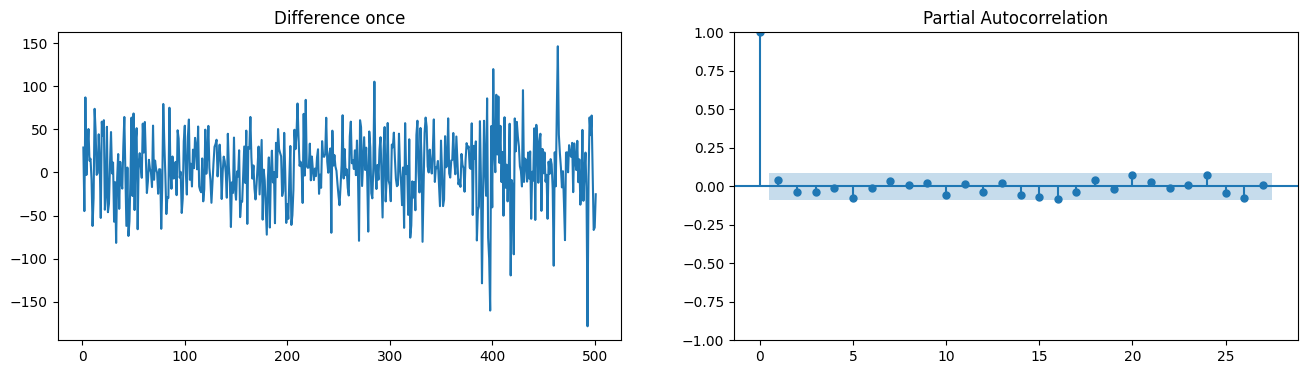

In [15]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax = ax2);

In [16]:
print("We see that the PACF plot lag no 0 stands out.\n We can also see that 5, 17 and 26 also stands out. But optimally, 0 is the best value.\n Therefore: p = 0")

We see that the PACF plot lag no 0 stands out.
 We can also see that 5, 17 and 26 also stands out. But optimally, 0 is the best value.
 Therefore: p = 0


In [17]:
print("Now, find 'q' the oder of the moving avergae (MA) term.\n This is the no of lag forecast errors to be used.\n MA is found using the ACF plot.")

Now, find 'q' the oder of the moving avergae (MA) term.
 This is the no of lag forecast errors to be used.
 MA is found using the ACF plot.


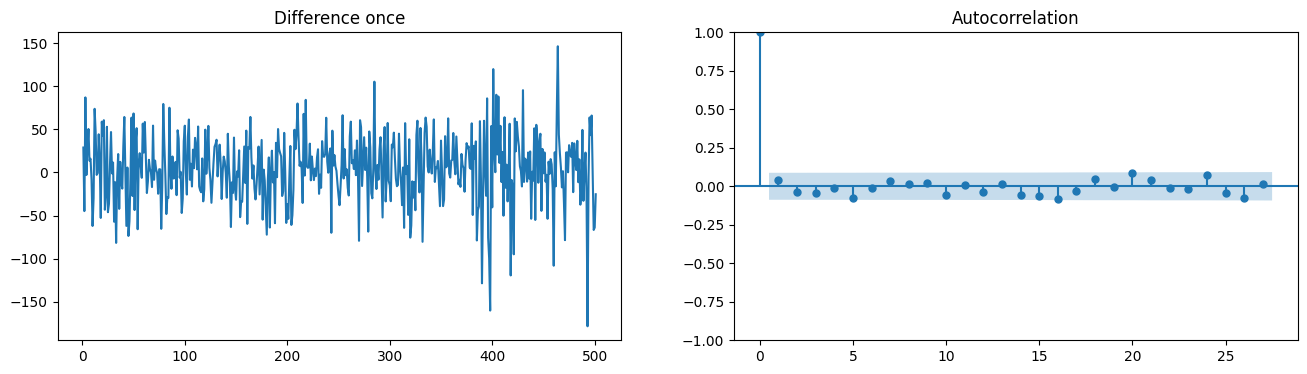

In [20]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax = ax2);

In [32]:
print("We can always see 0 as the optimal value by inference of the ACF graph. Therefore q = 0.")

We can always see 0 as the optimal value by inference of the ACF graph. Therefore q = 0.


In [39]:
print("ARIMA(0, 1, 0) is the optimal order.")

ARIMA(0, 1, 0) is the optimal order.


In [40]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
train, test = train_test_split(df.Close, test_size = 52)
model = pm.auto_arima(train, p = 0, d = 1, q = 0, stepwise = True)
result = model.fit(df.Close)

In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  502
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2549.044
Date:                Wed, 19 Nov 2025   AIC                           5102.088
Time:                        02:18:18   BIC                           5110.522
Sample:                             0   HQIC                          5105.397
                                - 502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1068      1.798      2.284      0.022       0.583       7.630
sigma2      1537.5539     74.154     20.735      0.000    1392.215    1682.893
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                69.63
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([2.49340569e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.97685766e-06]),
 array([-182.55647348,  217.70248648,  617.96144644, 1018.2204064 ,
        1418.47936636, 1818.73832633, 2218.99728629, 2619.25624625,
        3019.51520621, 3419.77416617, 3820.03312613]),
 <BarContainer object of 10 artists>)

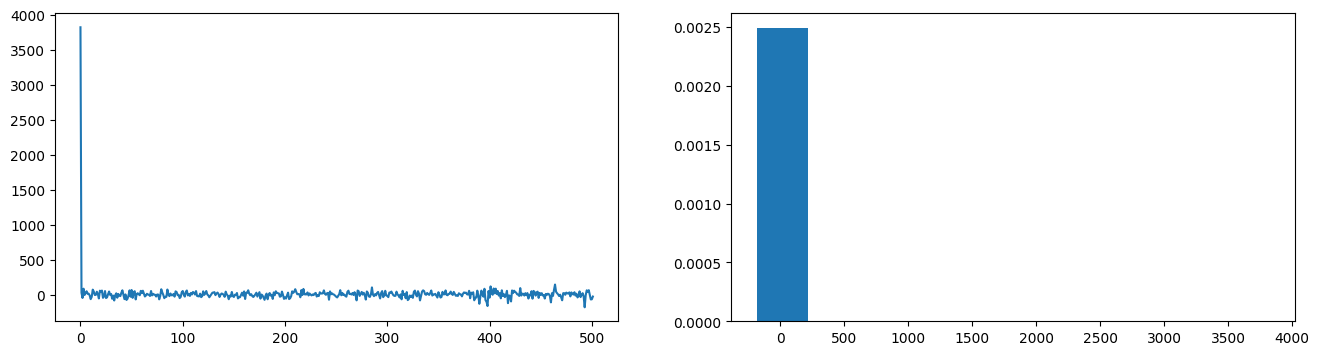

In [42]:
residuals = pd.DataFrame(result.resid())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density = True)

In [43]:
pred = model.predict(n_periods = len(test))
mse = mean_squared_error(test, pred)
r2 = r2_score(test, pred)
print(f"MSE:{mse}, R-squared:{r2}")

MSE:9247.318533452388, R-squared:0.1470069212986278
